## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Payam Barnaghi, Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Yu Chen, Tianyu Cui, Marirena Bafaloukou, Ruxandra Mihai
**Spring 2024**

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

Original code: https://colab.research.google.com/drive/1YQBSfS1Nb8a9TAMsV1RjWsiErWqXLbrj#scrollTo=ZF3foEKV8-r3

In [7]:
def normal(x,mu,sigma):
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi) 
    return numerator/denominator 

In [8]:
def gaussian_mcmc(steps,mu,sigma):
    states = []
    burn_in = int(steps*0.2)
    current = random.uniform(-1*sigma+mu,1*sigma+mu)
    for i in range(steps):
        states.append(current) #here we add the current to the list 
        movement = current + random.uniform(-0.25,0.25)
        
        curr_prob = normal(x=current,mu=mu,sigma=sigma)
        move_prob = normal(x=movement,mu=mu,sigma=sigma)
        
        acceptance = move_prob/curr_prob
        event = random.uniform(0,1)
        if acceptance > event:  #here we check if we should accept the move
            current = movement
            
    return states[burn_in:]

In [9]:
mu, sigma = 0,1
dist = gaussian_mcmc(100_000,mu=mu,sigma=sigma)
lines = np.linspace(-3,3,10_000)
normal_curve = [normal(x=l,mu=mu,sigma=sigma) for l in lines]

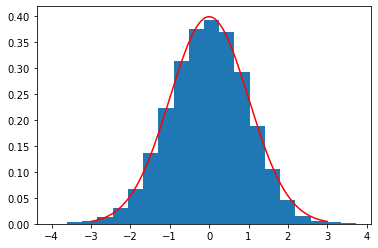

In [11]:
plt.hist(dist,bins=20,density=True) 
plt.plot(lines,normal_curve, color='red')